In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
from zipfile import ZipFile
directory_18 = r'F:\Ecobee\files\2018_sac'
df_sac_18_daily_nonpeak = pd.DataFrame()
import datetime
for filename in os.listdir(directory_18):
    myzip = ZipFile(os.path.join(directory_18, filename))
    g = myzip.open(filename[:-4])
    df_temp = pd.read_csv(g, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour >= 0) &
                        (df_temp1['DateTime'].dt.hour < 12) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_18_daily_nonpeak = pd.concat([df_sac_18_daily_nonpeak, df_day])
    g.close()
    myzip.close()

In [3]:
df_sac_18_daily_nonpeak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21189 entries, 0 to 121
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21189 non-null  object 
 1   daily_total_heating  21189 non-null  float64
 2   daily_total_cooling  21189 non-null  float64
 3   user_id              21189 non-null  object 
dtypes: float64(2), object(2)
memory usage: 827.7+ KB


In [4]:
pd.set_option('display.max_rows', None)
#remove user_ids that have no cooling consumption at all for 2018
df_18_temp=df_sac_18_daily_nonpeak[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
df_18_temp['any_usage']=(df_18_temp.daily_total_cooling>0)
df_18_temp=df_18_temp['user_id'][df_18_temp['any_usage']==True]
df_sac_18_daily_nonpeak=pd.merge(df_18_temp,df_sac_18_daily_nonpeak,how='left', on='user_id')


In [5]:
df_sac_18_daily_nonpeak.head()

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.000000
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,0.162500
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,0.845833
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,1.654167
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.308333


In [7]:
from zipfile import ZipFile
directory_19 = r'F:\Ecobee\files\2019_sac'
df_sac_19_daily_nonpeak = pd.DataFrame()
import datetime
for filename in os.listdir(directory_19):
    myzip = ZipFile(os.path.join(directory_19, filename))
    f = myzip.open(filename[:-4])
    df_temp = pd.read_csv(f, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour >= 0) &
                        (df_temp1['DateTime'].dt.hour < 12) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_19_daily_nonpeak = pd.concat([df_sac_19_daily_nonpeak, df_day])
    f.close()
    myzip.close()

In [8]:
df_sac_19_daily_nonpeak.head()

,Date,daily_total_heating,daily_total_cooling,user_id
0,2019-06-01,0.0,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2019-06-02,0.0,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2019-06-03,0.0,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2019-06-04,0.0,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2019-06-05,0.0,0.0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [9]:
pd.set_option('display.max_rows', None)
#remove user_ids that have no cooling consumption at all for 2019
df_19_temp=df_sac_19_daily_nonpeak[['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
df_19_temp['any_usage']=(df_19_temp.daily_total_cooling>0)
df_19_temp=df_19_temp['user_id'][df_19_temp['any_usage']==True]
df_sac_19_daily_nonpeak=pd.merge(df_19_temp,df_sac_19_daily_nonpeak,how='left', on='user_id')

In [10]:
df_sac_19_daily_nonpeak.head(10)

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-01,0.0,0.0
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-02,0.0,0.0
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-03,0.0,0.0
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-04,0.0,0.0
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-05,0.0,0.0
5,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-06,0.0,0.0
6,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-07,0.0,0.0
7,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-08,0.0,0.0
8,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-09,0.0,0.0
9,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2019-06-10,0.0,0.0


In [11]:
df_sac_18n19_daily_nonpeak=pd.concat([df_sac_18_daily_nonpeak,df_sac_19_daily_nonpeak])
df_sac_18n19_daily_nonpeak.head()

,user_id,Date,daily_total_heating,daily_total_cooling
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.000000
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,0.162500
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,0.845833
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,1.654167
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.308333


In [12]:
df_sac_18n19_daily_nonpeak['count'] = df_sac_18n19_daily_nonpeak.groupby('user_id')['user_id'].transform('count')
df_sac_18n19_daily_nonpeak['count'].value_counts()

243    27702
121    16819
122     3416
242     1694
241     1687
222     1332
236      708
240      480
239      478
238      476
118      472
230      460
218      436
193      386
119      357
120      240
237      237
235      235
234      234
116      232
232      232
231      231
229      229
228      228
225      225
224      224
110      220
219      219
109      218
217      217
211      211
205      205
101      202
98       196
186      186
176      176
85       170
84       168
167      167
158      158
152      152
143      143
133      133
125      125
123      123
115      115
112      112
97        97
96        96
94        94
91        91
88        88
74        74
65        65
63        63
47        47
46        46
37        37
16        16
4          4
Name: count, dtype: int64

In [13]:
df_sac_18n19_daily_nonpeak.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.000000,243
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,0.162500,243
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,0.845833,243
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,1.654167,243
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.308333,243


In [14]:
df_sac_18n19_daily_nonpeak=df_sac_18n19_daily_nonpeak[df_sac_18n19_daily_nonpeak['count']>=242]
df_sac_18n19_daily_nonpeak['Date']=pd.to_datetime(df_sac_18n19_daily_nonpeak['Date'])
df_sac_18n19_daily_nonpeak.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.000000,243
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,0.162500,243
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,0.845833,243
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,1.654167,243
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.308333,243


In [15]:
df_sac_18n19_daily_nonpeak.user_id.nunique()

121

In [16]:
df_temperature=pd.read_csv(r'F:\Ecobee\smf_temp_18and19.csv', parse_dates=['DATE'])
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  730 non-null    object        
 1   NAME     730 non-null    object        
 2   DATE     730 non-null    datetime64[ns]
 3   TAVG     730 non-null    int64         
 4   TMAX     730 non-null    int64         
 5   TMIN     730 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 34.3+ KB


In [17]:
df_temperature.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-01,49,65,38
1,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-02,48,59,39
2,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-03,50,57,40
3,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-04,55,65,49
4,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-05,55,60,50


In [18]:
df_sac_18n19_daily_nonpeak_w_temperature=pd.merge(df_sac_18n19_daily_nonpeak,df_temperature,how='left', left_on='Date', right_on='DATE')
df_sac_18n19_daily_nonpeak_w_temperature.head()

,user_id,Date,daily_total_heating,daily_total_cooling,count,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-01,0.0,0.000000,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
1,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-02,0.0,0.162500,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-02,74,96,55
2,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-03,0.0,0.845833,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-03,78,98,58
3,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-04,0.0,1.654167,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-04,76,89,58
4,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,2018-06-05,0.0,0.308333,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-05,67,84,53


In [19]:
df_sac_18n19_daily_nonpeak_w_temperature[
    'TAVG_less_62'] = df_sac_18n19_daily_nonpeak_w_temperature['TAVG'] - 62
df_sac_18n19_daily_nonpeak_w_temperature[
    'TAVG_less_62'] = df_sac_18n19_daily_nonpeak_w_temperature[
        'TAVG_less_62'].apply(lambda x: x if x > 0 else 0)

In [20]:
df_sac_18n19_daily_nonpeak_w_temperature['y2019'] = np.where(
    df_sac_18n19_daily_nonpeak_w_temperature['Date'].dt.year == 2019, 1, 0)
# [df_sac_18n19_daily_nonpeak_w_temperature['Date'].dt.year==2019]
df_sac_18n19_daily_nonpeak_w_temperature.describe()

,daily_total_heating,daily_total_cooling,count,TAVG,TMAX,TMIN,TAVG_less_62,y2019
count,29396.000000,29396.000000,29396.000000,29396.000000,29396.000000,29396.000000,29396.000000,29396.000000
mean,0.001728,0.506875,242.942373,72.721050,90.371071,58.489863,10.758096,0.497925
std,0.043239,0.985255,0.233041,5.188426,7.237253,4.004913,5.097861,0.500004
min,0.000000,0.000000,242.000000,58.000000,69.000000,45.000000,0.000000,0.000000
25%,0.000000,0.000000,243.000000,69.000000,86.000000,56.000000,7.000000,0.000000
50%,0.000000,0.000000,243.000000,73.000000,91.000000,58.000000,11.000000,0.000000
75%,0.000000,0.650000,243.000000,76.000000,96.000000,61.000000,14.000000,1.000000
max,3.995833,12.000000,243.000000,86.000000,105.000000,69.000000,24.000000,1.000000


In [21]:
df_sac_18n19_daily_nonpeak_w_temperature[
    'interaction'] = df_sac_18n19_daily_nonpeak_w_temperature[
        'TAVG_less_62'] * df_sac_18n19_daily_nonpeak_w_temperature['y2019']

In [22]:
import statsmodels.api as sm


def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit(cov_type='HC1')
    return result.params


#This is what you need
results=df_sac_18n19_daily_nonpeak_w_temperature.groupby('user_id').apply(
    regress, 'daily_total_cooling', ['TAVG_less_62','interaction']).reset_index()
results.head()

,user_id,TAVG_less_62,interaction,intercept
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,0.090409,-0.052959,-0.228739
1,00e2f68ec737f7480114a67bbef7c5f65b6b8516,0.013959,-0.003433,-0.060192
2,01479a9a84e1722791f2b440f6d4f14f51025499,0.053622,0.020124,-0.280388
3,0150a428f7cc891b6a69cb7db390869c96a24f1d,0.026873,0.163475,-0.254683
4,0614c5d47de23d61b21be2141907668a54bf45a0,0.087290,0.167151,-0.462331


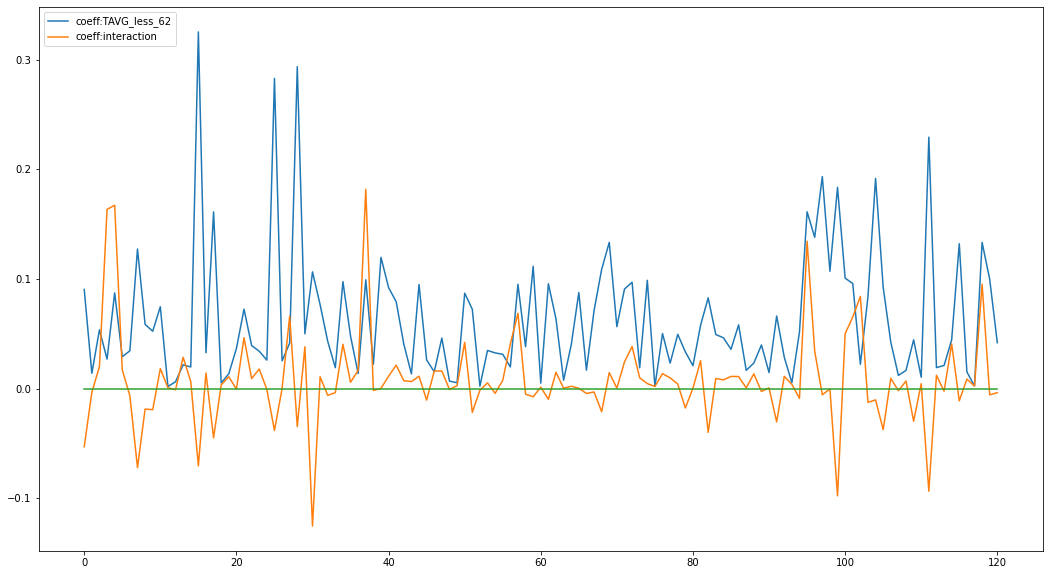

In [23]:
# x axis range
x = range(len(results))
plt.figure(figsize=(18, 10))
# y2
plt.plot(x, results['TAVG_less_62'], label='coeff:TAVG_less_62')
# y2
plt.plot(x, results['interaction'], label='coeff:interaction')
# y=0 line
plt.plot(x, [0] * len(results))
plt.legend(loc="upper left")

In [24]:
print(results[results.interaction > 0.01].count())
print(results[results.interaction < -0.01].count())

user_id         42
TAVG_less_62    42
interaction     42
intercept       42
dtype: int64
user_id         22
TAVG_less_62    22
interaction     22
intercept       22
dtype: int64


In [25]:
print(results['interaction'][results.interaction > 0.01].sum())
print(results['interaction'][results.interaction < -0.01].sum())
# the sum of negative interaction coefficients has a larger scale

1.7779353577597852
-0.9109072648187213


In [26]:
df_sac_18n19_daily_nonpeak_w_temperature['const']=1
reg1 = sm.OLS(endog=df_sac_18n19_daily_nonpeak_w_temperature['daily_total_cooling'], \
              exog=df_sac_18n19_daily_nonpeak_w_temperature[['TAVG_less_62','interaction','const']], \
    missing='drop')
reg_result = reg1.fit(cov_type='HC1')
print(reg_result.summary())
#Off-peak hours: Midnight to Noon
#2019 consumption INCREASED (by 12%)

                             OLS Regression Results                            
Dep. Variable:     daily_total_cooling   R-squared:                       0.129
Model:                             OLS   Adj. R-squared:                  0.129
Method:                  Least Squares   F-statistic:                     1611.
Date:                 Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                         21:43:27   Log-Likelihood:                -39241.
No. Observations:                29396   AIC:                         7.849e+04
Df Residuals:                    29393   BIC:                         7.851e+04
Df Model:                            2                                         
Covariance Type:                   HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
TAVG_less_62     0.0637      0.001    

In [27]:
df_sac_18n19_daily_nonpeak.user_id.nunique()

121

# Non-peak hours: 
2019 consumption INCREASED (12%), OFFSETTING (91.6%=76/83) peak hours savings (assuming equivalent working power of AC cooling); but can still be effective because of higher generation costs in peak hours